<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
The input Layer is where the feature data from the dataframe are input or where inputs from other neurons are recieved.
### Hidden Layer:
These are the layer that exist between the input layer and output layer. You cna have one hidden layer or many hidden layers
### Output Layer:
This is the answer/result of our neurons in our neural netoworks. These ouputs can then be used as inputs for the next layer of neurons or be the final output(s) of the neural network.
### Neuron:
The neuron recieves inputs, multiplies the inputs by their weights, sums everyhting up, and then applies the activation function to the sum. Usually involves a continuous activation function
### Weight:
This is the amount or positive or negative effect an input will be associated with the ending output. 
### Activation Function:
The activation function is how the neural network normalizes the results after inputs, weights, and biases have been applied within the neuron. 
### Node Map:
The node maps show how the features of the dataframe or the outputs of upper level neurons are further processed throughout the neural netowork. It shows inputs, outputs, and hidden layers visualized at a high level.
### Perceptron:
Simply, a perceptron consists of four distinct parts. Uses a binary activation function that is either activate or not, different from a neuron
1. Inputs
2. Weights
3. Weighted Sum
4. Activation Function (Output)

Perceptrons classify data into two parts (0,1) most of the time. Perceptrons are also known as Linear Binary Classifiers

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here
Depending on your network, Inputs and Outputs can range arbitraily. Each input can come from an upper level neuron or the intial inputted values from a dataframe. Each input can be weighted negatively or positvely depending on whether your desired answer needs the neuron to activate negatively or positively depending how your inputted bias as shifted the activation curve up or down.


## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

inputs = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,1]
])


outputs = np.array(([1], [1], [1], [0]))

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [3]:
# Initialize random weightss for our three inputs
weights = 2 * np.random.random((3,1)) - 1
weights

array([[-0.25091976],
       [ 0.90142861],
       [ 0.46398788]])

In [4]:
# Calculate weighted sum of inputs aand weights
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[0.46398788],
       [0.21306812],
       [1.3654165 ],
       [1.11449673]])

In [5]:
# Output the activated value for the end of 1 training epoch
activated_output = sigmoid(weighted_sum)
activated_output # True values are [1, 1, 1, 0]

array([[0.61395979],
       [0.55306642],
       [0.79663861],
       [0.75296649]])

In [6]:
# take difference eof output and true values to calculate error
error = outputs - activated_output
error

array([[ 0.38604021],
       [ 0.44693358],
       [ 0.20336139],
       [-0.75296649]])

In [7]:
# Gradient descent/backprop magic
"""
The adjusments to make to the weights, multiply the error of the sigmoid
derivative of the activated output. This tells how much to inncrease or 
decrease our weights by
"""
adjusted = error * sigmoid_derivative(activated_output)
adjusted

"""

This helps the perceptron activate correctly toward the right classification

"""

'\n\nThis helps the perceptron activate correctly toward the right classification\n\n'

In [8]:
"""the new weights will be equal to the dot product
of your inputs and the adjusted."""
#also known as an epoch or a single iteration
weights += np.dot(inputs.T, adjusted)
weights

array([[-0.31120624],
       [ 0.78109208],
       [ 0.53521543]])

In [9]:
# Steps we've already done: 
# 1. Randomly Initialized Weights already. Those are in memory as `weights`
# 2. We've already got input data & correct_outputs

"""
1. 
2.
3.
4.
"""

# Update our weights 10,000 times - (fingers crossed that this process 
# reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after train")
print(activated_output)

Weights after training
[[-11.83951525]
 [-11.83951525]
 [ 17.80813756]]
Output after train
[[0.99999998]
 [0.99744851]
 [0.99744851]
 [0.0028127 ]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [11]:
#Explore



In [27]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#features for X
feats = list(df)[:-1]

#split teh data
training, test = train_test_split(df, test_size=.2,)

X = training[feats]
y = training['Outcome']

X_test = test[feats]
y_test = test['Outcome']

normalize = MinMaxScaler()
X_norm = normalize.fit_transform(X)
X_test_norm = normalize.fit_transform(X_test)

In [59]:
##### Update this Class #####

class Perceptron(object):
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

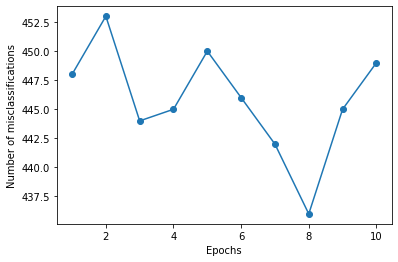

In [60]:
pn = Perceptron()
pn.fit(X_norm, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [61]:
from sklearn.metrics import accuracy_score
y_pred = pn.predict(X_test_norm)
accuracy_score(y_pred, y_test)

0.35714285714285715

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?